<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range (1,6)]

In [3]:
data = pd.DataFrame(columns=[*wt,*ko], index = genes)

In [4]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in data.index:
  data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
  data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  110   80   99   80  108  713  636  688  685  679
gene2  421  400  431  426  427  844  889  870  887  830
gene3  748  729  710  752  730  757  763  795  787  740
gene4  328  335  345  356  336  106   95  117  100  118
gene5  258  270  277  267  227  899  864  890  877  826


In [6]:
data.shape

(100, 10)

In [7]:
scaled_data = preprocessing.scale(data.T)

In [8]:
pca = PCA()

In [9]:
pca.fit(scaled_data)

PCA()

In [10]:
pca_data = pca.transform(scaled_data)

In [11]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)


In [12]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

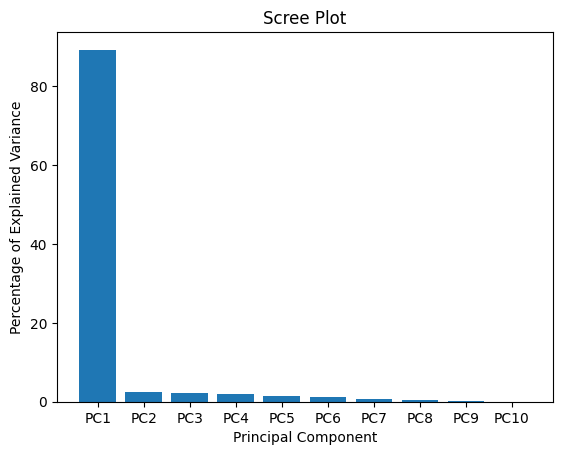

In [13]:
plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [14]:
pca_df = pd.DataFrame(pca_data, index =[*wt, *ko], columns = labels)

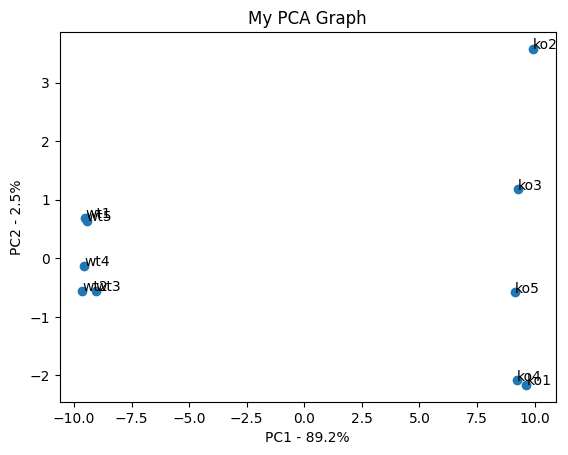

In [15]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [16]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [17]:
top_10_genes = sorted_loading_scores[0:10].index.values

In [18]:
print(loading_scores[top_10_genes])

gene28   -0.105829
gene10   -0.105813
gene99   -0.105809
gene31   -0.105751
gene92   -0.105751
gene61    0.105721
gene77   -0.105717
gene69   -0.105691
gene70   -0.105672
gene9    -0.105671
dtype: float64
